In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Set the aesthetics for Seaborn plots
sns.set(style="whitegrid")

In [0]:
socksDF = spark.read.format("csv").option("header", "true").load("/socks13.csv")

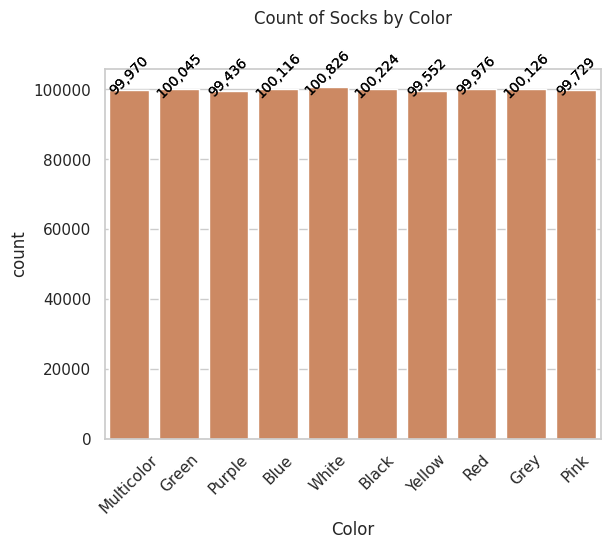

In [0]:
color_count = socksDF.groupBy("Color").count().toPandas()
ax = sns.barplot(x="Color", y="count", data=color_count)
sns.barplot(x="Color", y="count", data=color_count)
plt.title("Count of Socks by Color", y=1.10)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', # Adds a thousand separator
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=10, color='black',
    rotation=45, # Rotate the annotation
    xytext=(0, 10), textcoords='offset points')
plt.show()

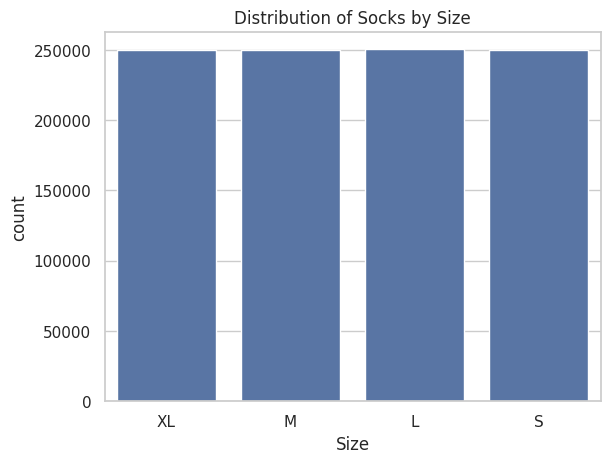

In [0]:
size_distribution = socksDF.groupBy("Size").count().toPandas()
sns.barplot(x="Size", y="count", data=size_distribution)
plt.title("Distribution of Socks by Size")
plt.show()

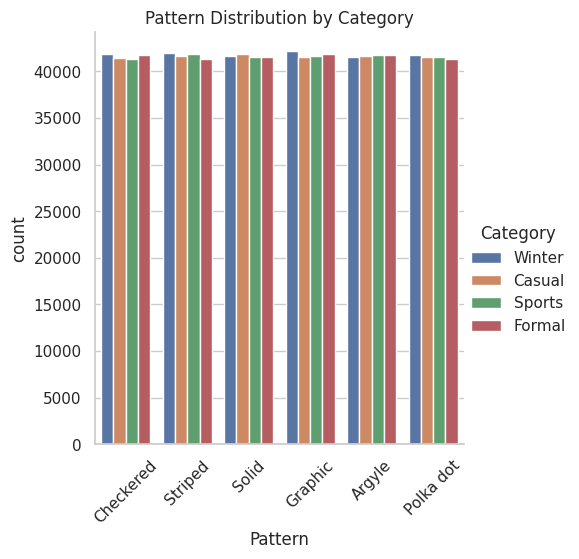

In [0]:
pattern_category = socksDF.groupBy("Category", "Pattern").count().toPandas()
sns.catplot(x="Pattern", y="count", hue="Category", data=pattern_category,
kind="bar")
plt.title("Pattern Distribution by Category")
plt.xticks(rotation=45)
plt.show()

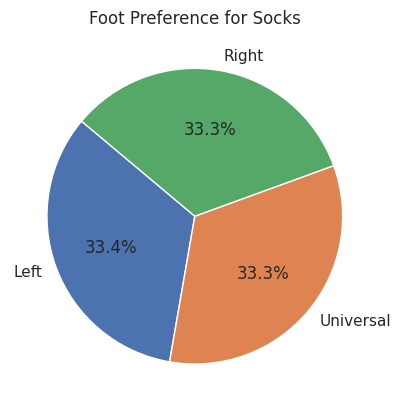

In [0]:
foot_preference = socksDF.groupBy("ForFoot").count().toPandas()
# Create the pie chart using Matplotlib
plt.pie(foot_preference['count'], labels=foot_preference['ForFoot'],
autopct='%1.1f%%', startangle=140)
plt.title("Foot Preference for Socks")
plt.show()

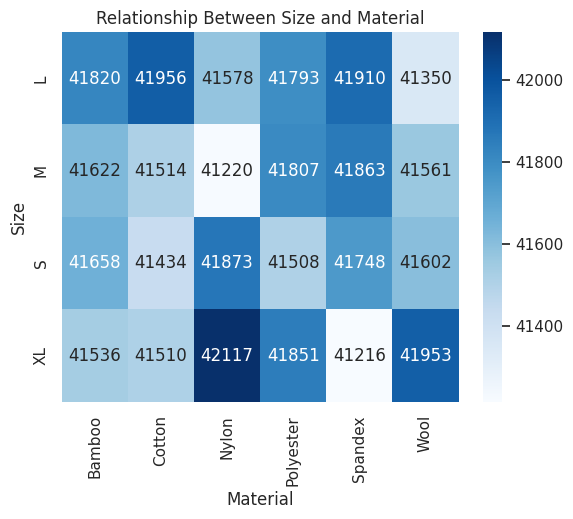

In [0]:
size_material = socksDF.groupBy("Size", "Material").count().toPandas()
sns.heatmap(size_material.pivot(index='Size', columns='Material', values='count'), annot=True,
fmt="d", cmap="Blues")
plt.title("Relationship Between Size and Material")
plt.show()

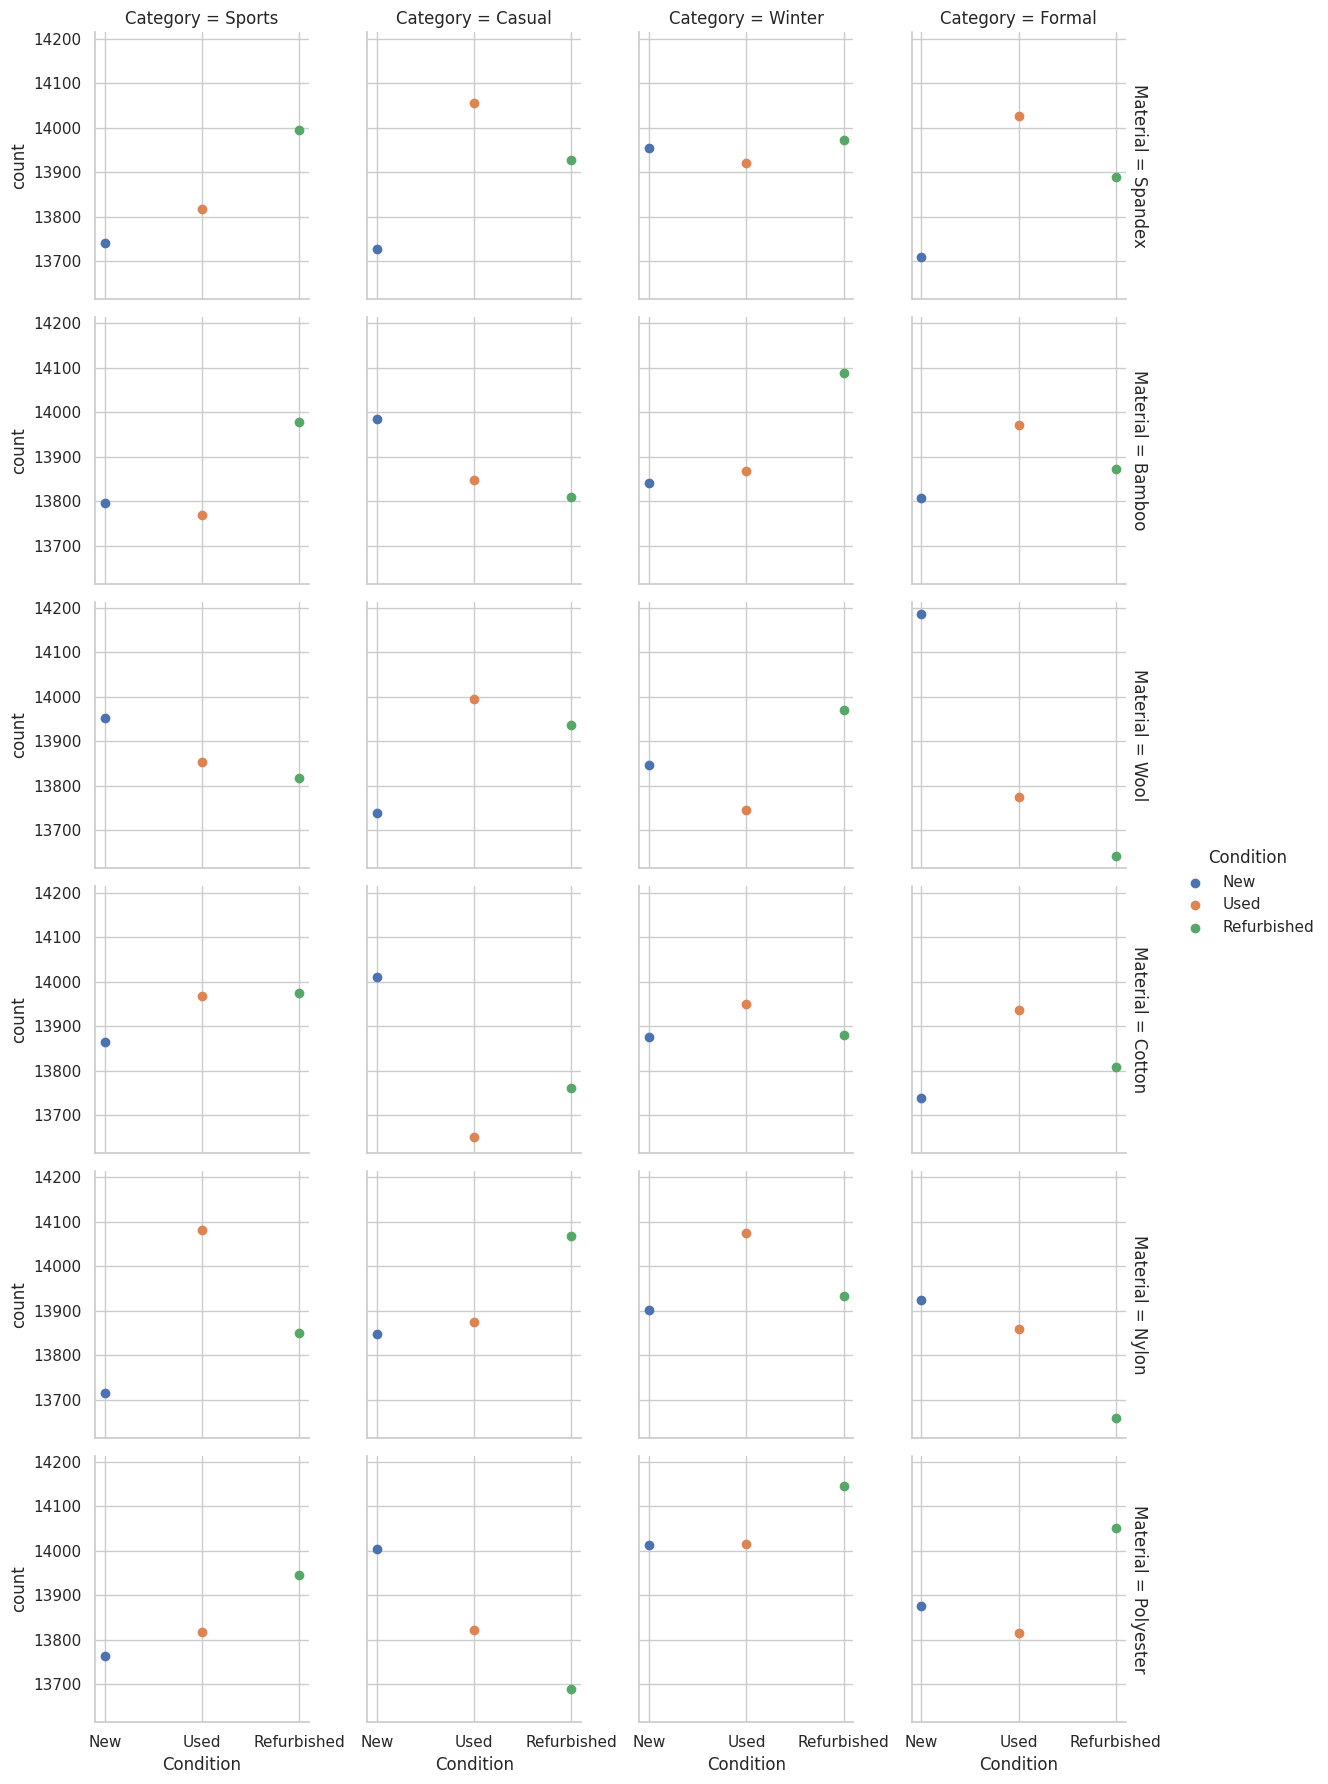

In [0]:
multi_var_analysis = socksDF.groupBy("Material", "Category",
"Condition").count().toPandas()
g = sns.FacetGrid(multi_var_analysis, col="Category", row="Material",
hue="Condition", margin_titles=True)
g = g.map(plt.scatter, "Condition", "count").add_legend()
plt.show()